In [1]:
import pandas as pd
UNH_full = pd.read_csv("UNH.csv", sep=",", parse_dates=['Date'])
UNH_full.info()
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime

UNH_full['D'] = UNH_full['Date'.replace('-',' ')]






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            315 non-null    datetime64[ns]
 1   Low             315 non-null    float64       
 2   Open            315 non-null    float64       
 3   Volume          315 non-null    int64         
 4   High            315 non-null    float64       
 5   Close           315 non-null    float64       
 6   Adjusted Close  315 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 17.4 KB


In [2]:
print(UNH_full.head(n=10))

        Date         Low        Open   Volume        High       Close  \
0 2020-01-02  289.790008  293.980011  2543400  295.700012  292.500000   
1 2020-03-01  284.359985  287.269989  2711400  291.880005  289.540008   
2 2020-01-06  287.220001  288.000000  3079100  291.660004  291.549988   
3 2020-01-07  287.579987  290.700012  2492900  291.489990  289.790008   
4 2020-01-08  290.040008  291.500000  3379200  297.380005  295.899994   
5 2020-01-09  293.720001  294.290008  2838200  297.200012  294.220001   
6 2020-01-10  292.209992  296.070007  2477900  296.070007  295.130005   
7 2020-01-13  285.019989  294.369995  6994900  294.450012  285.850006   
8 2020-01-14  284.250000  285.600006  6056300  288.239990  288.239990   
9 2020-01-15  289.000000  289.019989  6081300  299.640015  296.410004   

   Adjusted Close          D  
0      283.774139 2020-01-02  
1      280.902496 2020-03-01  
2      282.852478 2020-01-06  
3      281.145050 2020-01-07  
4      287.072754 2020-01-08  
5      285

<function matplotlib.pyplot.show(close=None, block=None)>

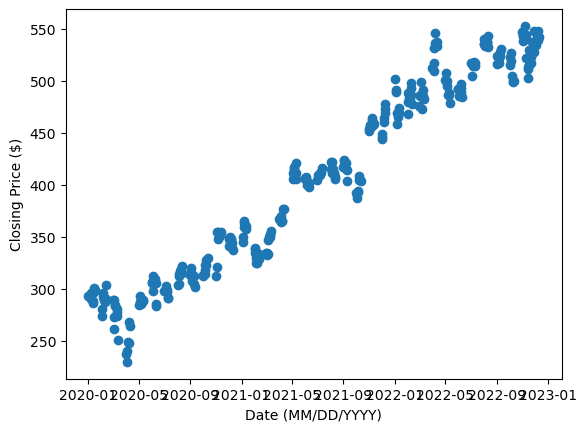

In [3]:
import matplotlib.pyplot as plt
date = UNH_full['Date']
close = UNH_full['Close']
plt.scatter(date, close)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('Closing Price ($)')
plt.show

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(UNH_full, 
                                        test_size=.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  252 Test size:  63


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Close']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Close']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -1291.636882395116
    Coefficients [4.98635876e-89 0.00000000e+00 3.95298756e-52]
    Score 0.9536344165617691
MAE is  15.481108737701264
RMSE is  19.579711568687287
MSE is  383.3651051129867
R^2   0.9536344165617691

Results for polynomial regression on test data
MAE is  17.262544903038037
RMSE is  22.341690915590142
MSE is  499.1511529677631
R^2     0.9461272958372452


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet


power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Close']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Close']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -3912.236331572629
    Coefficients [2.31284436e-15 1.30941852e-34 4.98574927e-53]
    Score 0.9534081244006641
MAE is  15.436678715595532
RMSE is  19.627433843491865
MSE is  385.2361592806499
R^2   0.9534081244006641

Results for elastic net on test data
MAE is  17.179391688228854
RMSE is  22.321245994492042
MSE is  498.238022746627
R^2     0.9462258487384513


C:\Users\jstcl\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.854e+04, tolerance: 2.084e+02
  model = cd_fast.enet_coordinate_descent(
